# Regresión Logística
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Vanesa Resúa Eiras, Cristina Gómez Alonso

En este notebook tomaremos como referencia el material del profesor Dr. Tirthajyoti Sarkar donde demuestra como resolver un problema de regresión logística de predicción de Hipotiroidismo con las librerías **Scikit-learn** y **Statsmodels**.

El dataset es original de UCI ML repository.
<br>Link: https://archive.ics.uci.edu/ml/datasets/Thyroid+

Explicaciones previas:
* [Glándula tiroides](https://es.wikipedia.org/wiki/Gl%C3%A1ndula_tiroides)
* [Hipotiroidismo](https://www.youtube.com/watch?v=RYGjvqrj22Q) minuto 1:53

## 1. Importación de paquetes y dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
names = 'response age sex on_thyroxine query_on_thyroxine antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant \
sick tumor lithium goitre TSH_measured TSH T3_measured \
T3 TT4_measured TT4 T4U_measured T4U FTI_measured FTI TBG_measured TBG'

In [ ]:
names = names.split(' ')

In [ ]:
df = pd.read_csv('Notebooks_data_files/hypothyroid.csv',index_col=False,names=names,na_values=['?'])

In [ ]:
df.head()

In [ ]:
df.shape

## 2. Preprocessing

### 2.1. Borrado de columnas innecesarias

Borraremos todas las features que tienen en su nombre la palabra measured o querey ya que son redundantes.

In [ ]:
to_drop=[]
for c in df.columns:
    if 'measured' in c or 'query' in c:
        to_drop.append(c)

In [ ]:
to_drop

In [ ]:
to_drop.append('TBG')

In [ ]:
df.drop(to_drop,axis=1,inplace=True)

In [ ]:
df.head()

Consultamos los valores estadísticos básicos de cada columna. Si añadimos .T a la función 'describe' podemos transponer la matriz resultado y ayuda a la comprensión de dichos valores.

In [ ]:
df.describe().T

### 2.2. Tratamiento de missing values
La función `df.isna()` retorna un dataframe de valores booleanos (true para indicar la existencia de valor y false para valores missing). Si añadimos la función sum se verán y calcularán el número de missing values para cada columna.

In [ ]:
df.isna().sum()

En este caso borraremos las filas con valores missing ya que desconocemos de conocimiento experto en el área que nos ayude a estimar correctamente dichos valores desconocidos.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape
df['response'].unique()

### 2.3. Transformación de datos categóricos manualmente

La columna **response** contiene los valores 'hypothyroid' para indicar que el paciente sufre hipertiroidismo y 'negative' para indicar que no. Los sustituiremos manualmente por valores numéricos (hypothyroid=1 y negative=0).

In [ ]:
def class_convert(response):
    if response=='hypothyroid':
        return 1
    else:
        return 0

In [ ]:
df['response']=df['response'].apply(class_convert)

In [ ]:
df.head()

In [ ]:
df.columns

## 3. Visual EDA

### 3.1. Diagrama de cajas

Un diagrama de caja (en inglés boxplot) es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana(el valor que ocupa la posición central de un conjunto de observaciones ordenadas) y los cuartiles de los datos, y también pueden representarse sus valores atípicos (o outlayers).
![Explicacion boxplot](./data/box_plot.png) 

In [ ]:
for var in ['age','TSH','T3','TT4','T4U','FTI']:
    sns.boxplot(x='response',y=var,data=df)
    plt.show()

### 3.2. Análisis de correlaciones entre variables independendientes

In [ ]:
sns.pairplot(data=df[df.columns[1:]],diag_kws={'edgecolor':'k','bins':25},plot_kws={'edgecolor':'k'})
plt.show()

### 3.3. Transformación de datos categóricos con get_dummies

In [ ]:
df_dummies = pd.get_dummies(data=df)

In [ ]:
df_dummies.shape

In [ ]:
df_dummies.sample(10)

## 4. División del dataset

La variable X contendrá todas las columnas a excepción de response.
La variable y contendrá exclusivamente la columna response.

In [ ]:
from sklearn.model_selection import train_test_split
X = df_dummies.drop('response',axis=1)
y = df_dummies['response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)#ademais de escalar aprende a media e varianza dos nosos datos
X_test = scaler.transform(X_test)

In [ ]:
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

## 5. Creación del modelo de Regresión Logística

Se implementará la regresión logística con regularización Ridge L2(por defecto). [Aquí](https://www.iartificial.net/regularizacion-lasso-l1-ridge-l2-y-elasticnet/) más información sobre los tipos de regularizaciones.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf1 = LogisticRegression(penalty='l2')

## 6. Entrenamiento

In [ ]:
clf1.fit(X_train,y_train)

## 7. Cálculo de intercept, coefficients y score

In [ ]:
clf1.intercept_

In [ ]:
clf1.coef_

In [ ]:
clf1.score(X_test,y_test)

## 8. Predicciones

Para las regresiones logísticas, el método `predict_proba` estima la probabilidad de ser de tipo 0 (NO) y la probabilidad de ser de tipo 1(YES).

In [ ]:
prob_threshold = 0.5

In [ ]:
prob_df=pd.DataFrame(clf1.predict_proba(X_test[:10]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)
prob_df

In [ ]:
y_test[:10]

## 9. Informe de classificación (classification report) y matriz de confusión (confusion matrix)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, clf1.predict(X_test)))

In [ ]:
print(classification_report(y_test, clf1.predict(X_test)))

## Ejercicio: Titanic

1. Carga: toma como base el fichero titanic_train.csv y cárgalo.
2. Visual EDA:
   ¿Exiset algún patrón de supervivencia basado en el sexo?
   Crea el siguiente gráfico: sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
    ¿Y basado en el clase de los pasajeros (pclass)?
    Crea un histograma que represente la edad de los pasajeros.
    Contrasta la clase respecto a la edad.
3. Preprocessing:
    Sustituye los missing values de la edad por el valor medio.
    Suprime columnas innecesarias.
    Convierte columnas categóricas por variables dummies
4. Creación modelo de regresión logística
5. Entrenamiento
6. Obtén el informe de clasificación y la matriz de confusión.


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


titanic = pd.read_csv('Notebooks_data_files/titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Eliminar columnas prescindibles


In [77]:
to_drop = ['Name','Ticket','Cabin','Fare','Embarked']
titanic.drop(to_drop,axis=1,inplace=True)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,NaN,1,2
889,890,1,1,male,26.0,0,0


/tmp/ipykernel_114832/3587637033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data= titanic ,palette='RdBu_r', ax= axes[0])


Text(0.5, 1.0, 'Supervivencia según sexo ')

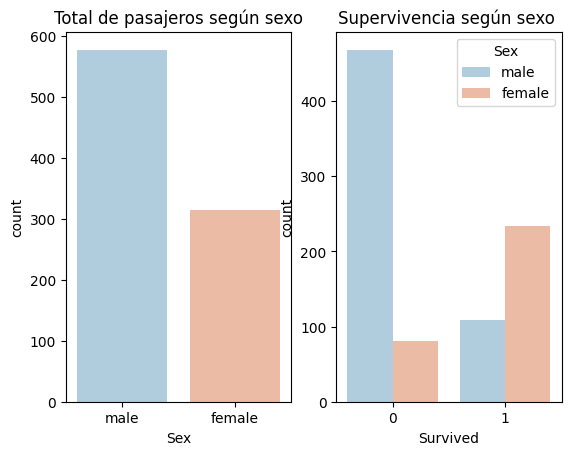

In [78]:
# Para poder representar las dos gráficas en la misma ejecución pero por separado (Si no, lo mete todo en una)
fig, axes = plt.subplots(1, 2)

sns.countplot(x='Sex',data= titanic ,palette='RdBu_r', ax= axes[0])
axes[0].set_title('Total de pasajeros según sexo')
 
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r', ax= axes[1])
axes[1].set_title('Supervivencia según sexo ')

/tmp/ipykernel_114832/992974154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',data= titanic ,palette='Set2', ax= axes[0])


Text(0.5, 1.0, 'Supervivencia según clase ')

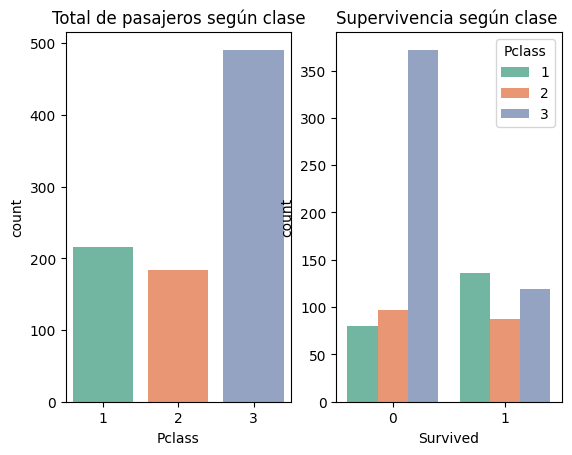

In [79]:
fig, axes = plt.subplots(1, 2)

sns.countplot(x='Pclass',data= titanic ,palette='Set2', ax= axes[0])
axes[0].set_title('Total de pasajeros según clase')

sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='Set2', ax= axes[1])
axes[1].set_title('Supervivencia según clase ')

## Sustituir nulos en la columna 'Age' por su media


In [80]:
titanic.isnull().sum()
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

Text(0.5, 1.0, 'Clase respecto edad')

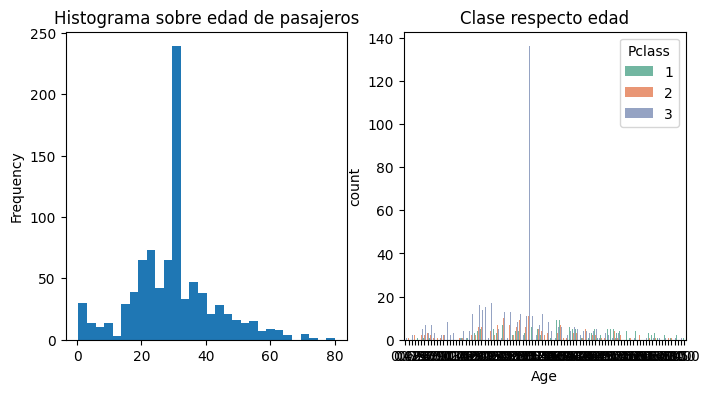

In [81]:
fig, axes = plt.subplots(1, 2)
titanic['Age'].plot.hist(bins=30,figsize=(8,4), ax= axes[0])
axes[0].set_title('Histograma sobre edad de pasajeros')

sns.countplot(x='Age',hue='Pclass',data=titanic,palette='Set2', ax= axes[1])
axes[1].set_title('Clase respecto edad')

## Convierto datos categóricos con dummies


In [82]:
df_dummies = pd.get_dummies(data = titanic)
df_dummies.sample(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
369,370,1,1,24.000000,0,0,True,False
522,523,0,3,29.699118,0,0,False,True
422,423,0,3,29.000000,0,0,False,True
623,624,0,3,21.000000,0,0,False,True
377,378,0,1,27.000000,0,2,False,True


## División dataset

In [83]:
from sklearn.model_selection import train_test_split
X = df_dummies.drop('Survived',axis=1)
y = df_dummies['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)#ademais de escalar aprende a media e varianza dos nosos datos
X_test = scaler.transform(X_test)


## Creación modelo regresión logística


In [84]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(penalty='l2')

#Entrenamiento
clf2.fit(X_train,y_train)

LogisticRegression()

In [85]:
# Intercept
clf2.intercept_

array([-0.71415995])

In [86]:
# Coefficient
clf2.coef_

array([[ 0.07927479, -0.8386878 , -0.45077317, -0.3178479 , -0.0869445 ,
         0.62719448, -0.62719448]])

In [87]:
# Score
clf2.score(X_test,y_test)

0.8134328358208955

## 8. Predicciones

In [88]:
grupo_test = [{"PassengerId": 1, "Pclass": 3, "Age": 20, "SibSp": 0, "Parch": 2, "Sex_female": False, "Sex_male": True},
              {"PassengerId": 2, "Pclass": 2, "Age": 20, "SibSp": 0, "Parch": 2, "Sex_female": True, "Sex_male": False},
              {"PassengerId": 3, "Pclass": 1, "Age": 60, "SibSp": 0, "Parch": 2, "Sex_female": False, "Sex_male": True},
              {"PassengerId": 4, "Pclass": 1, "Age": 60, "SibSp": 0, "Parch": 2, "Sex_female": True, "Sex_male": False}
             ]

grupo_test_df = pd.DataFrame(grupo_test)
entrenado = scaler.fit_transform(grupo_test_df)

prob_df = pd.DataFrame(clf2.predict_proba(entrenado),columns=['Prob of NO','Prob of YES'])
prob_threshold = 0.5
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)
prob_df

,Prob of NO,Prob of YES,Decision
0,0.947275,0.052725,0
1,0.331219,0.668781,1
2,0.835518,0.164482,0
3,0.277994,0.722006,1


## 9. Informe de classificación (classification report) y matriz de confusión (confusion matrix)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
print(confusion_matrix(y_test, clf2.predict(X_test)))

[[139  18]
 [ 32  79]]


In [91]:
print(classification_report(y_test, clf2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

